In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cleaning categorical data

In [2]:
data = pd.read_csv('HC4A_unit4_ver1.csv')

In [3]:
data.shape

(90569, 29)

In [4]:
#watch out for "fake" categoricals like INCOME - may need to treat it as a categorical.
data['final_income'].value_counts(dropna=False)

2.0    18040
5.0    17076
4.0    14677
1.0    14437
3.0    10318
6.0     8216
7.0     7805
Name: final_income, dtype: int64

In [5]:
data.dtypes

STATE                   object
PVASTATE                object
DOB                      int64
MDMAUD                  object
RECP3                   object
GENDER                  object
DOMAIN                  object
HOMEOWNR                object
HV1                      int64
HV2                      int64
HV3                      int64
HV4                      int64
IC1                      int64
IC2                      int64
IC3                      int64
IC4                      int64
IC5                      int64
VETERANS                object
NUMPROM                  int64
CARDPROM                 int64
CARDPM12                 int64
NUMPRM12                 int64
MAXADATE                 int64
RFA_2                   object
NGIFTALL                 int64
TIMELAG                float64
AVGGIFT                float64
final_income           float64
TIMELAG_transformed    float64
dtype: object

In [6]:
categoricals = data.select_dtypes(object)
categoricals.head()

,STATE,PVASTATE,MDMAUD,RECP3,GENDER,DOMAIN,HOMEOWNR,VETERANS,RFA_2
0,IL,NaN,XXXX,NaN,F,T2,NaN,NaN,L4E
1,CA,NaN,XXXX,NaN,M,S1,H,NaN,L2G
2,NC,NaN,XXXX,NaN,M,R2,U,NaN,L4E
3,CA,NaN,XXXX,NaN,F,R2,U,NaN,L4E
4,FL,NaN,XXXX,X,F,S2,H,NaN,L2F


In [7]:
categoricals.isna().sum()/len(categoricals)
#data.shape

STATE       0.000000
PVASTATE    0.984708
MDMAUD      0.000000
RECP3       0.979761
GENDER      0.030860
DOMAIN      0.024026
HOMEOWNR    0.232431
VETERANS    0.891287
RFA_2       0.000000
dtype: float64

In [8]:
display(data['PVASTATE'].value_counts(dropna=False))
display(data['RECP3'].value_counts(dropna=False))
display(data['VETERANS'].value_counts(dropna=False))

NaN    89184
P       1380
E          5
Name: PVASTATE, dtype: int64

NaN    88736
X       1833
Name: RECP3, dtype: int64

NaN    80723
Y       9846
Name: VETERANS, dtype: int64

In [9]:
#data = data.drop(columns=['PVASTATE'], axis=1)
data['PVASTATE'] = data['PVASTATE'].fillna('N')
data['RECP3'] = data['RECP3'].fillna('N')
data['VETERANS'] = data['VETERANS'].fillna('N')
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,HOMEOWNR,HV1,HV2,...,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,final_income,TIMELAG_transformed
0,IL,N,3712,XXXX,N,F,T2,NaN,479,635,...,27,6,14,9702,L4E,31,4.0,7.741935,4.0,1.386294
1,CA,N,5202,XXXX,N,M,S1,H,5468,5218,...,12,6,13,9702,L2G,3,18.0,15.666667,6.0,2.890372
2,NC,N,0,XXXX,N,M,R2,U,497,546,...,26,6,14,9702,L4E,27,12.0,7.481481,3.0,2.484907
3,CA,N,2801,XXXX,N,F,R2,U,1000,1263,...,27,6,14,9702,L4E,16,9.0,6.812500,1.0,2.197225
4,FL,N,2001,XXXX,X,F,S2,H,576,594,...,43,10,25,9702,L2F,37,14.0,6.864865,3.0,2.639057


In [ ]:
#Activity 1 - tell students to look at documentation carefully

In [ ]:
data.GENDER.value_counts(dropna=False)

F      48668
M      37132
NaN     2795
U       1635
J        336
C          2
A          1
Name: GENDER, dtype: int64

In [10]:
data.DOMAIN.value_counts(dropna=False)

R2     13006
T2     11717
S1     10866
S2      8054
C2      7834
C1      5793
C3      5056
T1      4712
R3      4572
U1      4259
U2      3111
U3      2484
NaN     2176
T3      2092
S3      1817
U4      1735
R1      1285
Name: DOMAIN, dtype: int64

In [ ]:
data[data['GENDER'].isnull()]

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,HOMEOWNR,HV1,HV2,...,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,final_income,TIMELAG_transformed
89713,GA,N,0,XXXX,N,NaN,C3,NaN,473,476,...,6,4,10,9702,L1F,1,NaN,20.000000,3.0,1.826874
89741,OR,N,0,XXXX,N,NaN,R1,NaN,867,963,...,35,6,16,9702,L3F,36,6.0,9.555556,2.0,1.791759
89783,WA,N,0,XXXX,N,NaN,C2,NaN,849,918,...,10,6,12,9702,L3E,4,5.0,7.250000,3.0,1.609438
89784,OR,N,0,XXXX,N,NaN,U2,NaN,751,781,...,9,6,12,9702,L2G,2,6.0,17.500000,4.0,1.791759
89789,FL,N,0,XXXX,N,NaN,U2,NaN,1613,2137,...,4,2,6,9702,L2F,2,3.0,10.000000,2.0,1.098612
89809,CA,N,0,XXXX,N,NaN,T1,NaN,2483,2937,...,8,3,9,9702,L1F,2,17.0,15.000000,2.0,2.833213
89877,AL,N,3101,XXXX,X,NaN,C4,NaN,822,873,...,5,3,8,9702,L1F,1,NaN,15.000000,1.0,1.826874
89892,IL,N,0,XXXX,N,NaN,R3,NaN,309,369,...,14,6,12,9702,L1F,3,12.0,15.000000,2.0,2.484907
89917,WI,N,0,XXXX,N,NaN,C2,NaN,555,601,...,21,6,12,9702,L4D,12,3.0,5.416667,1.0,1.098612
90043,CA,N,0,XXXX,N,NaN,U1,NaN,2139,2149,...,3,2,4,9612,L1F,1,NaN,20.000000,1.0,1.826874


In [11]:
#data = data[~data['GENDER'].isnull()] to drop the rows? We may want to accept that people don't want to specify their gender as M or F
data['GENDER'] = data['GENDER'].fillna('U')
data['GENDER'] = np.where(data['GENDER'].isin(['J','C','A']) , 'U', data['GENDER'])
data['GENDER'].value_counts()

F    48668
M    37132
U     4769
Name: GENDER, dtype: int64

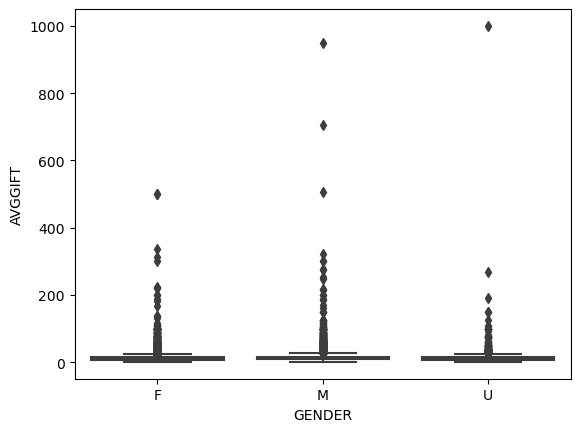

In [12]:
sns.boxplot(x="GENDER", y="AVGGIFT", data=data)
plt.show()

In [ ]:
data.groupby('GENDER').agg({'AVGGIFT':np.mean})

,AVGGIFT
GENDER,
F,13.012336
M,13.970821
U,13.454532


In [13]:
count_states = data['STATE'].value_counts(dropna=False)
count_states

CA    16284
FL     7959
TX     7166
IL     6124
MI     5375
NC     3956
WA     3383
GA     3261
IN     2855
WI     2656
MO     2583
TN     2396
AZ     2278
MN     2081
OR     2045
CO     1929
SC     1660
AL     1627
OK     1553
KY     1542
LA     1533
KS     1233
IA     1214
AR      969
MS      948
NV      923
NM      824
NE      715
UT      546
ID      504
MT      498
HI      423
SD      278
AK      275
WY      267
ND      241
AP       78
NY       70
VA       54
OH       52
PA       36
MD       30
MA       25
NJ       24
CT       20
AA       15
AE       14
ME       11
NH        8
RI        6
VT        6
VI        5
WV        3
GU        3
DE        3
AS        1
DC        1
Name: STATE, dtype: int64

In [14]:
count_states[count_states < 2500] # will leave us with 11 states and 'other'

TN    2396
AZ    2278
MN    2081
OR    2045
CO    1929
SC    1660
AL    1627
OK    1553
KY    1542
LA    1533
KS    1233
IA    1214
AR     969
MS     948
NV     923
NM     824
NE     715
UT     546
ID     504
MT     498
HI     423
SD     278
AK     275
WY     267
ND     241
AP      78
NY      70
VA      54
OH      52
PA      36
MD      30
MA      25
NJ      24
CT      20
AA      15
AE      14
ME      11
NH       8
RI       6
VT       6
VI       5
WV       3
GU       3
DE       3
AS       1
DC       1
Name: STATE, dtype: int64

In [15]:
small_states = list(count_states[count_states < 2500].index)
small_states

['TN',
 'AZ',
 'MN',
 'OR',
 'CO',
 'SC',
 'AL',
 'OK',
 'KY',
 'LA',
 'KS',
 'IA',
 'AR',
 'MS',
 'NV',
 'NM',
 'NE',
 'UT',
 'ID',
 'MT',
 'HI',
 'SD',
 'AK',
 'WY',
 'ND',
 'AP',
 'NY',
 'VA',
 'OH',
 'PA',
 'MD',
 'MA',
 'NJ',
 'CT',
 'AA',
 'AE',
 'ME',
 'NH',
 'RI',
 'VT',
 'VI',
 'WV',
 'GU',
 'DE',
 'AS',
 'DC']

In [ ]:
data['STATE'] = np.where(data.STATE.isin(small_states),'other', data.STATE)

In [16]:
data.STATE.value_counts(dropna=False)

CA    16284
FL     7959
TX     7166
IL     6124
MI     5375
NC     3956
WA     3383
GA     3261
IN     2855
WI     2656
MO     2583
TN     2396
AZ     2278
MN     2081
OR     2045
CO     1929
SC     1660
AL     1627
OK     1553
KY     1542
LA     1533
KS     1233
IA     1214
AR      969
MS      948
NV      923
NM      824
NE      715
UT      546
ID      504
MT      498
HI      423
SD      278
AK      275
WY      267
ND      241
AP       78
NY       70
VA       54
OH       52
PA       36
MD       30
MA       25
NJ       24
CT       20
AA       15
AE       14
ME       11
NH        8
RI        6
VT        6
VI        5
WV        3
GU        3
DE        3
AS        1
DC        1
Name: STATE, dtype: int64

In [17]:
# def clean_state(x):
#     if x in small_states:
#         return 'other'
#     else:
#         return x

# data['STATE'] = data['STATE'].apply(clean_state)

# data['STATE'] = np.where(data['STATE']isin(small_state), 'other', data['STATE'])

In [18]:
data['MDMAUD'].value_counts(dropna=False)

XXXX    90290
C1CM       59
L1CM       44
I1CM       34
D2CM       27
C2CM       23
D1CM       19
L2CM       14
C1LM        8
L1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
I1LM        3
D5TM        3
C2MM        3
C5CM        3
C2LM        2
C1MM        1
I2MM        1
I5CM        1
I5MM        1
C5MM        1
L1MM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64

In [25]:
def clean_MDMAUD(x):
    if x !='XXXX':
         return 'other'
    else:
        return x

data['MDMAUD'] = data['MDMAUD'].apply(clean_MDMAUD)

# data['STATE'] = np.where(data['STATE']isin(small_state), 'other', data['STATE'])

In [27]:
# alternative
data['MDMAUD'] = np.where(data['MDMAUD']=='XXXX', 'XXXX', 'other')

In [26]:
data['MDMAUD'].value_counts(dropna=False)

XXXX     90290
other      279
Name: MDMAUD, dtype: int64

In [19]:
data.isna().sum()

STATE                      0
PVASTATE                   0
DOB                        0
MDMAUD                     0
RECP3                      0
GENDER                     0
DOMAIN                  2176
HOMEOWNR               21051
HV1                        0
HV2                        0
HV3                        0
HV4                        0
IC1                        0
IC2                        0
IC3                        0
IC4                        0
IC5                        0
VETERANS                   0
NUMPROM                    0
CARDPROM                   0
CARDPM12                   0
NUMPRM12                   0
MAXADATE                   0
RFA_2                      0
NGIFTALL                   0
TIMELAG                 9653
AVGGIFT                    0
final_income               0
TIMELAG_transformed        0
dtype: int64

In [20]:
# someties it makes sense to turn a numerical variable into a categorical one: binning
numericals = data.select_dtypes(np.number)
numericals.head()

,DOB,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT,final_income,TIMELAG_transformed
0,3712,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,31,4.0,7.741935,4.0,1.386294
1,5202,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3,18.0,15.666667,6.0,2.890372
2,0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27,12.0,7.481481,3.0,2.484907
3,2801,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16,9.0,6.812500,1.0,2.197225
4,2001,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,37,14.0,6.864865,3.0,2.639057


In [28]:
ic2_labels = ['Low', 'Moderate', 'High', 'Very High']
data['ic2_category'] = pd.cut(data['IC2'],4,labels=ic2_labels)
data[['IC2','ic2_category']].head(20)

,IC2,ic2_category
0,318,Low
1,1096,High
2,292,Low
3,388,Moderate
4,250,Low
5,410,Moderate
6,284,Low
7,457,Moderate
8,266,Low
9,329,Low


In [29]:
data['ic2_category'].value_counts()

Low          50651
Moderate     36648
High          2766
Very High      504
Name: ic2_category, dtype: int64

In [30]:
ic2_labels = ['Low', 'Moderate', 'High', 'Very High']
data['ic2_category_quartiles'] = pd.qcut(data['IC2'],4,labels=ic2_labels)
data[['IC2','ic2_category_quartiles']].head(20)

,IC2,ic2_category_quartiles
0,318,Moderate
1,1096,Very High
2,292,Moderate
3,388,High
4,250,Low
5,410,High
6,284,Moderate
7,457,High
8,266,Low
9,329,Moderate


In [31]:
data['ic2_category_quartiles'].value_counts()

Low          22745
Moderate     22718
Very High    22594
High         22512
Name: ic2_category_quartiles, dtype: int64

In [32]:
ic2_labels = ['Low', 'Moderate', 'High', 'Very High']
data['ic2_category_userdef'] = pd.cut(data['IC2'],[0,300,500,1000,10000],labels=ic2_labels)
data[['IC2','ic2_category_userdef']].head(20)

,IC2,ic2_category_userdef
0,318,Moderate
1,1096,Very High
2,292,Low
3,388,Moderate
4,250,Low
5,410,Moderate
6,284,Low
7,457,Moderate
8,266,Low
9,329,Moderate


In [33]:
data['ic2_category_userdef'].value_counts()

Moderate     42839
Low          29197
High         16688
Very High      953
Name: ic2_category_userdef, dtype: int64

In [34]:
# but if we have a categorical variable, it becomes harder to look at 'correlation' with the target;
# for a numerical one we can do
data.IC2.corr(data.AVGGIFT)

0.0878996654583967

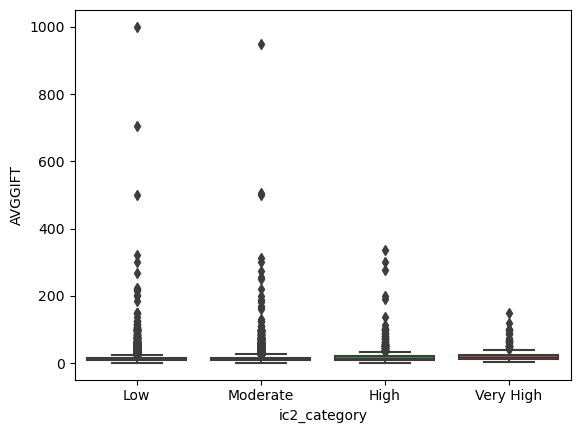

In [35]:
# for categorical variables we can plot the relation, like this:
sns.boxplot(x="ic2_category", y=data.AVGGIFT, data=data)
plt.show()

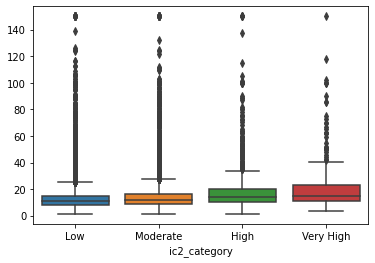

In [ ]:
# limiting the plot to AVGGIFT values of less than 150, to make the effect more visible:
sns.boxplot(x="ic2_category", y=np.where(data.AVGGIFT>150,150,data.AVGGIFT), data=data)
plt.show()

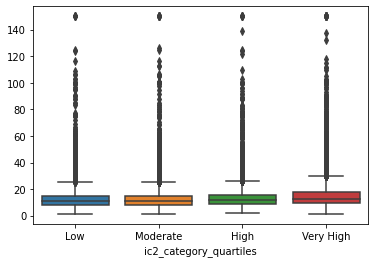

In [ ]:
sns.boxplot(x="ic2_category_quartiles", y=np.where(data.AVGGIFT>150,150,data.AVGGIFT), data=data)
plt.show()

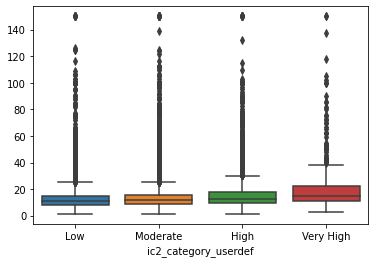

In [ ]:
sns.boxplot(x="ic2_category_userdef", y=np.where(data.AVGGIFT>150,150,data.AVGGIFT), data=data)
plt.show()

In [ ]:
data['IC2'].corr(data['AVGGIFT']) 

0.08789966545839684

In [ ]:
# low numeric correlation, but quite usable as a categorical variable: 
# Highs and Very Highs are interesting targets